In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math

In [2]:
xTrain = np.array([
    [2104, 5, 1, 45],
    [1416, 3, 2, 40],
    [852, 2, 1, 35]
])
yTrain = np.array([460, 232, 178])
print(f"Train data size for x: {xTrain.shape}")
print(xTrain)
print(f"\n\nTrain data size for y: {yTrain.shape}")
print(yTrain)

Train data size for x: (3, 4)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]


Train data size for y: (3,)
[460 232 178]


In [3]:
# Initializing the b and w parameters
b_init = np.zeros(xTrain.shape[1])
w_init = np.zeros(xTrain.shape[1])

In [4]:
def predict(x, w, b):
    """
    Predict the output for the given input x.
    Args:
        x(ndarray): The input data
        w(ndarray): The weight vector
        b(float): The bias value
    Returns:
        ndarray: The predicted output
    """
    return np.dot(x, w) + b

In [5]:
def compute_cost(x, y, w, b):
    """
    Compute cost for a set of input values
    Args:
        x(ndarray): The input data
        y(ndarray): The actual output
        w(ndarray): The weight vector
        b(float): The bias value
    Returns:
        float: The computed cost
    """

    n = x.shape[0]
    cost_ = 0
    for i in range(n):
        cost_ += (predict(x[i], w, b) - y[i])**2
    
    return cost_/(2*n)

In [6]:
def compute_gradient(X, y, w, b):
    """
    Compute the gradint of the cost function with respect to w and b.
    Args:
        X(ndarray): The input data matrix
        y(ndarray): The target output
        w(ndarray): The weight vector
        b(float): The bias value
    Returns:
        dJdwi(ndarray): The gradient of the cost function with respect to w
        dJdb(float): The gradient of the cost function with respect to b
    """
    m,n = X.shape
    dJdwi = np.zeros(n)
    dJdb = 0

    for i in range(m):
        dJdb += (predict(X[i,:], w, b) - y[i])  
        for j in range(n):
            dJdwi[j] += X[i,j] * (predict(X[i,:], w, b) - y[i])

    
    return dJdb/m,dJdwi/m

In [7]:
def gradient_descent(X, y, wInit, bInit, alpha, costFcn, gradientFcn, numIters):
    """
    Perform gradient descent to minimize the cost function.
    Args:
        X(ndarray): The input data matrix
        y(ndarray): The target output
        wInit(ndarray): The initial weight vector
        bInit(float): The initial bias value
        alpha(float): The learning rate
        costFcn(function): The cost function
        gradientFcn(function): The gradient function
        numIters(int): The number of iterations
    Returns:
        w(ndarray): The optimized weight vector
        b(float): The optimized bias value
        costHistory(list): The history of cost values
    """
    w = wInit
    b = bInit
    costHistory = np.zeros(numIters)
    for i in range(numIters):
        dJdb, dJdw = compute_gradient(X, y, w, b)
        w = w - alpha * dJdw
        b = b - alpha * dJdb
        costHistory[i] = compute_cost(X, y, w, b)
    return w, b, costHistory

In [8]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 100000
alpha = 5.0e-7
w, b, costHist = gradient_descent(xTrain, yTrain, initial_w, initial_b, alpha, compute_cost, compute_gradient, iterations)
print(f"w: {w}\nb: {b}")

w: [ 0.24224154  0.28821169 -0.85520022 -1.57622854]
b: -0.041685017649388985


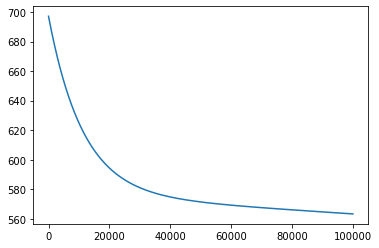

In [9]:
plt.plot(costHist[3:])
plt.show()